In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Reading metrics data

In [2]:
raw_data = pd.read_csv("results/metrics.csv")

In [3]:
raw_data = raw_data.drop([i for i in range(12)])

In [4]:
raw_data = raw_data.drop([15])

In [5]:
raw_data

,version,model,optim,date,numb_epochs,accuracy,balanced_accuracy,precision,recall,tp,fp,tn,fn,f1
12,10.1,resnet50,Adam,15-06-21,200,74.967962,77.313585,0.927039,0.728090,1296,102,459,484,0.815607
13,10.2,resnet50,Adam,16-06-21,200,76.932935,76.103217,0.906291,0.776966,1383,143,418,397,0.836661
14,10.3,resnet50,Adam,16-06-21,200,76.078599,77.860812,0.926573,0.744382,1325,105,456,455,0.825545
16,11.1,mobilenetv2,Adam,19-06-21,200,84.536523,74.999549,0.872374,0.933146,1661,243,318,119,0.901737
17,11.2,mobilenetv2,Adam,19-06-21,200,84.621956,74.994692,0.872117,0.934831,1664,244,317,116,0.902386
18,11.3,mobilenetv2,Adam,22-06-21,200,84.152072,71.023503,0.849281,0.962360,1713,304,257,67,0.902291
19,12.1,vgg16,SGD,23-06-21,200,78.428022,55.113161,0.779483,0.998876,1778,503,58,2,0.875646
20,12.2,vgg16,SGD,24-06-21,200,78.598889,55.469667,0.780852,0.998876,1778,499,62,2,0.876510
21,12.3,vgg16,SGD,25-06-21,200,81.119180,75.132789,0.883162,0.866292,1542,204,357,238,0.874645
22,13.1,vgg16,Adam,28-06-21,200,23.964118,50.000000,0.000000,0.000000,0,0,561,1780,0.000000


In [6]:
class Metrics:
    def __init__(self, df):
        self.info = df.describe()
        
        self.avg_accuracy = self.info.accuracy[1]
        self.std_accuracy = self.info.accuracy[2]
        
        self.avg_balanced_accuracy = self.info.balanced_accuracy[1]
        self.std_balanced_accuracy = self.info.balanced_accuracy[2]
        
        self.avg_recall = self.info.recall[1]
        self.std_recall = self.info.recall[2]
        
        self.avg_precision = self.info.precision[1]
        self.std_precision = self.info.precision[2]
        
        def accuracy_info():
            return self.avg_accuracy, self.std_accuracy
        
        def baccuracy_info():
            return self.avg_balanced_accuracy, self.std_balanced_accuracy
        
        def recall_info():
            return self.avg_accuracy, self.std_accuracy
        
        def precision_info():
            return self.avg_precision, self.std_precision

In [7]:
class OptimInfo:
    def __init__(self, df, optim_name):
        self.optim = optim_name
        self.data = df[df.optim.str.contains(self.optim)]

        self.metrics = Metrics(self.data)
        
        def avg_metrics():
            return self.metrics.accuracy_info(), self.metrics.baccuracy_info(), self.metrics.recall_info(), self.metrics.precision_info()
        
        def accuracy_info():
            return self.metrics.accuracy()

In [8]:
class ModelTestsInfos:
    def __init__(self, df, model_name):
        self.model = model_name
        self.data = df[df.model.str.contains(self.model)]

        self.sgd_optim = OptimInfo(self.data, "SGD")
        self.adam_optim = OptimInfo(self.data, "Adam")
        
    def get_sgd_avg_metrics():
        return self.sgd.avg_metrics()

In [9]:
resnet50 = ModelTestsInfos(raw_data, "resnet50")
vgg16 = ModelTestsInfos(raw_data, "vgg16")
mobilenetv2 = ModelTestsInfos(raw_data, "mobilenetv2")
densenet121 = ModelTestsInfos(raw_data, "densenet121")
nets = [resnet50, vgg16, mobilenetv2, densenet121]

In [10]:
print('*'*20)
avg_accuracy = []
avg_baccuracy = []
avg_recall = []
avg_precision = []

name = []

std_accuracy = []
std_baccuracy = []
std_recall = []
std_precision = []

optim = ["Adam", "SGD","Adam", "SGD","Adam", "SGD","Adam", "SGD"]

for net in nets:
    aux = []
    
    
    print(f'CNN: {net.model}')
#     name.append(net.model)
    name.append(net.model)
    
    avg_accuracy.append(net.adam_optim.metrics.avg_accuracy)
    avg_accuracy.append(net.sgd_optim.metrics.avg_accuracy)
    std_accuracy.append(net.adam_optim.metrics.std_accuracy)
    std_accuracy.append(net.sgd_optim.metrics.std_accuracy)
    
    avg_baccuracy.append(net.adam_optim.metrics.avg_balanced_accuracy)
    avg_baccuracy.append(net.sgd_optim.metrics.avg_balanced_accuracy)
    std_baccuracy.append(net.adam_optim.metrics.std_balanced_accuracy)
    std_baccuracy.append(net.sgd_optim.metrics.std_balanced_accuracy)

    avg_recall.append(net.adam_optim.metrics.avg_recall)
    avg_recall.append(net.sgd_optim.metrics.avg_recall)
    std_recall.append(net.adam_optim.metrics.std_recall)
    std_recall.append(net.sgd_optim.metrics.std_recall)

    avg_precision.append(net.adam_optim.metrics.avg_precision)
    avg_precision.append(net.sgd_optim.metrics.avg_precision)
    std_precision.append(net.adam_optim.metrics.std_precision)
    std_precision.append(net.sgd_optim.metrics.std_precision)

********************
CNN: resnet50
CNN: vgg16
CNN: mobilenetv2
CNN: densenet121


In [30]:
for i, net in enumerate(nets):
    print(f"CNN {net.model}")
    print("-")
    print(f'Accuracy Adam: {avg_accuracy[2*i]:.5} +- {std_accuracy[2*i]:2.4}')
    print(f'Accuracy SGD: {avg_accuracy[2*i + 1]:.5} +- {std_accuracy[2*i + 1]:2.4} ')
    print("-")
    print(f'Balanced Accuracy Adam: {avg_baccuracy[2*i]:.5} +- {std_baccuracy[2*i]:2.4}')
    print(f'Balanced Accuracy SGD: {avg_baccuracy[2*i + 1]:.5} +- {std_baccuracy[2*i + 1]:2.4} ')
    print("-")
    print(f'Precision Adam: {avg_precision[2*i] * 100:.5} +- {std_precision[2*i] * 100:2.4}')
    print(f'Precision SGD: {avg_precision[2*i + 1] * 100:.5} +- {std_precision[2*i + 1] *100:2.4} ')
    print("-")
    print(f'Recall Adam: {avg_recall[2*i]*100:.5} +- {std_recall[2*i]*100:2.3}')
    print(f'Recall SGD: {avg_recall[2*i + 1]*100:.5} +- {std_recall[2*i + 1]*100:2.3} ')
    print("-")
    print("*"*10, end='\n\n')


CNN resnet50
-
Accuracy Adam: 75.993 +- 0.9853
Accuracy SGD: 81.418 +- 0.4852 
-
Balanced Accuracy Adam: 77.093 +- 0.8994
Balanced Accuracy SGD: 65.299 +- 0.6392 
-
Precision Adam: 91.997 +- 1.185
Precision SGD: 82.306 +- 0.2611 
-
Recall Adam: 74.981 +- 2.49
Recall SGD: 96.255 +- 0.382 
-
**********

CNN vgg16
-
Accuracy Adam: 58.679 +- 30.06
Accuracy SGD: 79.382 +- 1.507 
-
Balanced Accuracy Adam: 50.0 +- 0.0
Balanced Accuracy SGD: 61.905 +- 11.46 
-
Precision Adam: 50.691 +- 43.9
Precision SGD: 81.45 +- 5.947 
-
Recall Adam: 66.667 +- 57.7
Recall SGD: 95.468 +- 7.65 
-
**********

CNN mobilenetv2
-
Accuracy Adam: 84.437 +- 0.2503
Accuracy SGD: 81.219 +- 0.2019 
-
Balanced Accuracy Adam: 73.673 +- 2.294
Balanced Accuracy SGD: 61.73 +- 0.1774 
-
Precision Adam: 86.459 +- 1.326
Precision SGD: 80.606 +- 0.0693 
-
Recall Adam: 94.345 +- 1.64
Recall SGD: 99.157 +- 0.297 
-
**********

CNN densenet121
-
Accuracy Adam: 83.91 +- 3.152
Accuracy SGD: 81.02 +- 0.3206 
-
Balanced Accuracy Adam: 

In [142]:
avg_recall

[0.749812734082397,
 0.9625468164794007,
 0.6666666666666666,
 0.9546816479400752,
 0.9434456928838951,
 0.9915730337078653,
 0.9672284644194756,
 0.9820224719101124]

In [146]:
std_recall

[0.024886647032531718,
 0.003824078250311213,
 0.5773502691896258,
 0.07654756378019764,
 0.016401544037189172,
 0.0029727542820951075,
 0.007024344319666994,
 0.004897639262405355]

In [143]:
avg_precision

[0.9199676699775137,
 0.8230584236636963,
 0.506905880677773,
 0.814498731101517,
 0.8645908201864523,
 0.8060589147308441,
 0.8443897065890688,
 0.8091574863834047]

In [147]:
std_precision

[0.011846664775616517,
 0.002611089065099603,
 0.43899336999467486,
 0.059467653975939186,
 0.013259217963258477,
 0.0006929991998523409,
 0.026252218366855037,
 0.0040206493287782965]

In [137]:
name

['resnet50', 'vgg16', 'mobilenetv2', 'densenet121']

In [198]:
def plot_graph(avg, std, ylabel, title, ylim0, ylim1, step, path):
    fig, ax = plt.subplots(figsize=(13,10))

    width = 0.3

    rects1 = ax.bar(np.arange(4), 
             [avg[0], avg[2], avg[4], avg[6]], 
             yerr=[std[0], std[2], std[4], std[6]],
             align='center', alpha=0.5, color = 'b', ecolor='black', capsize=10, width=width)
    rects2 = ax.bar(np.arange(4) + width, 
             [avg[1], avg[3], avg[5], avg[7]], 
             yerr=[std[1], std[3], std[5], std[7]],
             align='center', alpha=0.5, color = 'g', ecolor='black', capsize=10, width=width)

    ax.set_xticks(np.arange(4))
    ax.set_yticks(np.arange(ylim0, ylim1, step=step))
    ax.set_xticks(np.arange(4) + width/2)

    plt.ylim([ylim0, ylim1])

    plt.legend(['Adam', 'SGD'], fontsize=12, title="Otimizador")
    
    ax.set_ylabel(ylabel, fontsize=18)
    ax.set_xticklabels(name, fontsize=18)
    ax.set_title(title, fontsize=20)
    ax.yaxis.grid(True)
    
    plt.savefig(path, dpi=300,bbox_inches='tight')

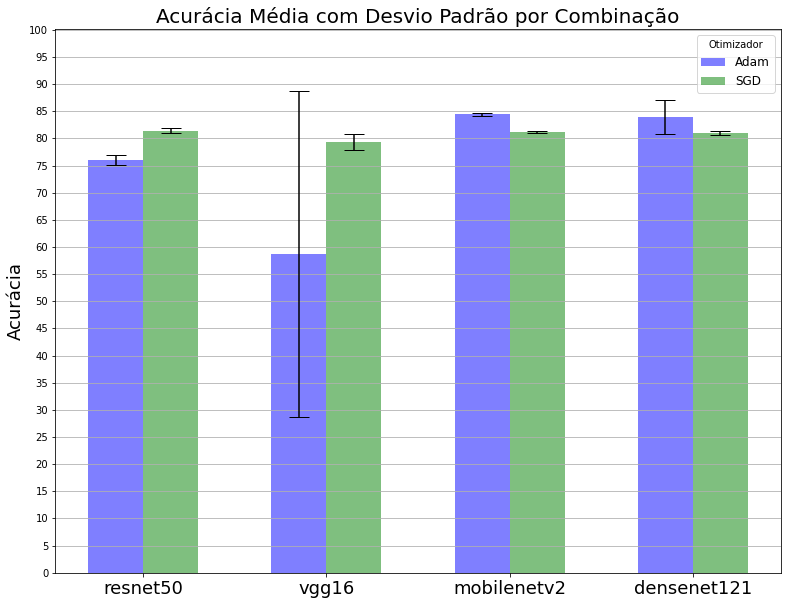

In [200]:
plot_graph(avg_accuracy, 
           std_accuracy, 
           "Acurácia", 
           "Acurácia Média com Desvio Padrão por Combinação", 
           0, 100.1, 
           5,
           "results/average/accuracy.png")

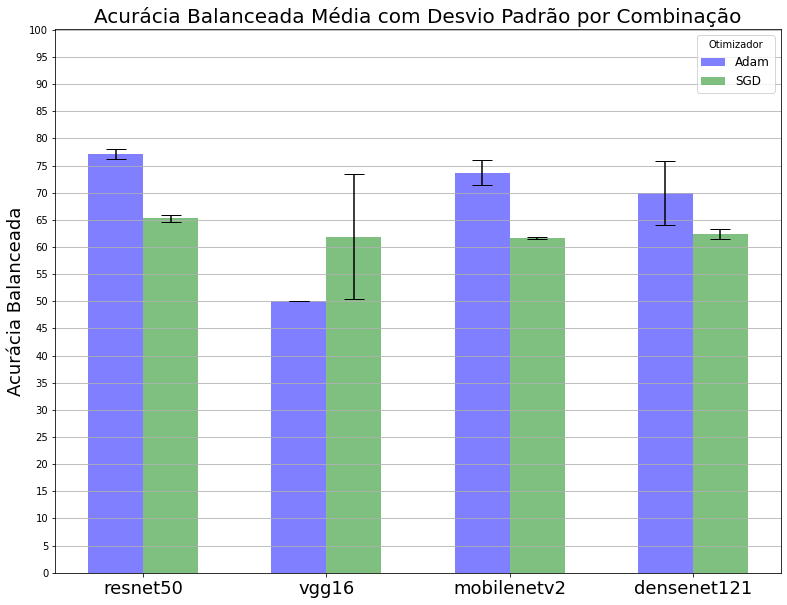

In [201]:
plot_graph(avg_baccuracy, std_baccuracy, 
           "Acurácia Balanceada", 
           "Acurácia Balanceada Média com Desvio Padrão por Combinação", 
           0, 100.1, 
           5,
           "results/average/balanced_accuracy.png")

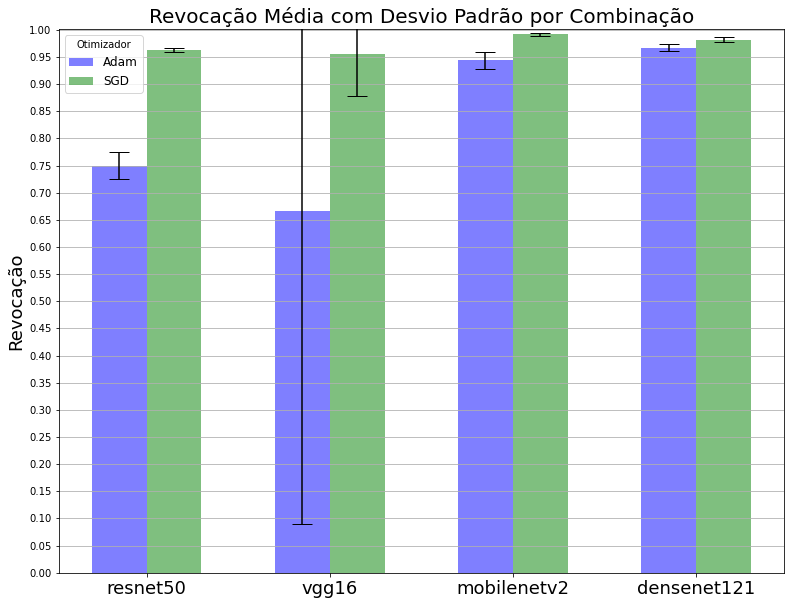

In [202]:
plot_graph(avg_recall, std_recall, 
           "Revocação", 
           "Revocação Média com Desvio Padrão por Combinação", 
           0, 1.001, 
           0.05,
           "results/average/recall.png")

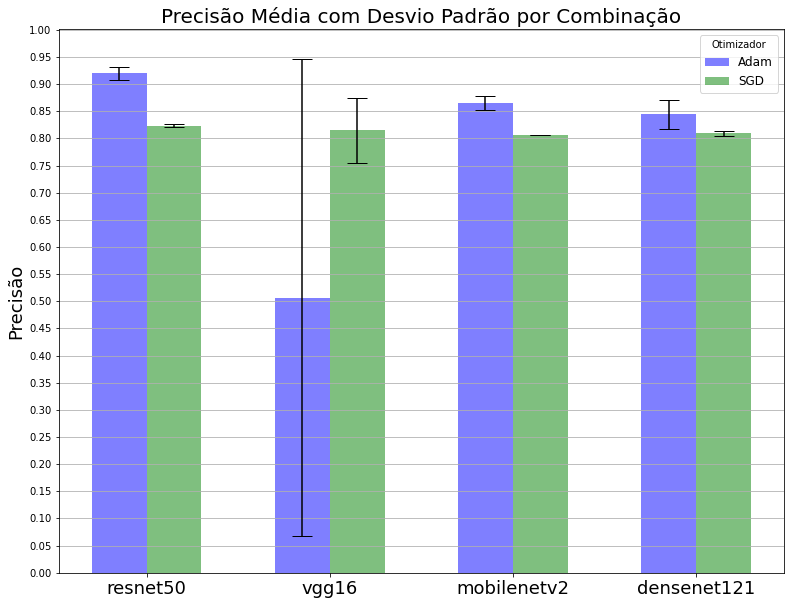

In [203]:
plot_graph(avg_precision, std_precision, 
           "Precisão", 
           "Precisão Média com Desvio Padrão por Combinação", 
           0, 1.001, 
           0.05,
           "results/average/precision.png")